# Pharmaceutical Sales prediction

## Imports

In [5]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
import seaborn as sns
import plotly.io as pio
from IPython.display import Image

In [6]:
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)
colors = ['#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF',
          '#FECB52', '#636EFA', '#EF553B', '#00CC96', '#AB63FA', ]

In [7]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_handler import FileHandler
from vis_plotly import VisPlotly
from vis_seaborn import VisSeaborn
from time_series_model import TimeSeriesModel

In [8]:
file_handler = FileHandler()
sn = VisSeaborn()

## Preprocessing

We have already cleaned the data and removed outliers in preprocessing notebook. Then we had also seen which features influence sales in the exploratory section. Now we are now familiar with the data, the final part is selecting the main features and preparing them for training. I have created a script called `create_features.py` for merging both training and test data with the store data.  Then it creates the main features for training and stores them in the features folder. Let's look into the data to see which features are selected.

In [9]:
train_features = file_handler.read_csv("../features/train_features.csv")
test_features = file_handler.read_csv("../features/test_features.csv")
train_sales = file_handler.read_csv("../features/train_sales.csv")
train_customers = file_handler.read_csv("../features/train_customers.csv")
test_sales = file_handler.read_csv("../features/test_sales.csv")
test_customers = file_handler.read_csv("../features/test_customers.csv")

2021-08-01 19:22:35,102 — DfHelper — DEBUG — file read as csv
2021-08-01 19:22:35,380 — DfHelper — DEBUG — file read as csv
2021-08-01 19:22:35,462 — DfHelper — DEBUG — file read as csv
2021-08-01 19:22:35,528 — DfHelper — DEBUG — file read as csv
2021-08-01 19:22:35,545 — DfHelper — DEBUG — file read as csv
2021-08-01 19:22:35,562 — DfHelper — DEBUG — file read as csv


In [10]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675513 entries, 0 to 675512
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DayOfWeek                  675513 non-null  int64  
 1   Promo                      675513 non-null  int64  
 2   StateHoliday               675513 non-null  int64  
 3   SchoolHoliday              675513 non-null  int64  
 4   StoreType                  675513 non-null  int64  
 5   Assortment                 675513 non-null  int64  
 6   CompetitionDistance        675513 non-null  int64  
 7   Promo2                     675513 non-null  int64  
 8   PromoInterval0             675513 non-null  int64  
 9   PromoInterval1             675513 non-null  int64  
 10  PromoInterval2             675513 non-null  int64  
 11  PromoInterval3             675513 non-null  int64  
 12  days_before_state_holiday  675513 non-null  int64  
 13  days_after_state_holiday   67

In [11]:
train_features

,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3,days_before_state_holiday,days_after_state_holiday,Year,Month,Day,WeekOfYear,Weekend,Weekday,part_of_month,CompetitionOpen,Promo2Open
0,1,0,1,1,1,1,1410,0,0,0,0,0,0,0,2013,1,1,1,0,1,0,52,60.25
1,1,0,1,1,1,1,860,0,0,0,0,0,0,0,2013,1,1,1,0,1,0,159,168.25
2,1,0,1,1,1,2,1210,0,0,0,0,0,0,0,2013,1,1,1,0,1,0,276,276.25
3,1,0,1,1,1,0,1260,0,0,0,0,0,0,0,2013,1,1,1,0,1,0,19,24.25
4,1,0,1,1,1,0,1180,0,0,0,0,0,0,0,2013,1,1,1,0,1,0,-4,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675508,4,1,0,0,0,2,16107,1,3,6,9,12,84393,23064,2015,1,30,5,0,1,2,300,298.75
675509,4,1,0,0,3,2,5350,1,3,6,9,12,84392,23065,2015,1,30,5,0,1,2,300,295.75
675510,4,1,0,0,2,0,4030,1,1,4,7,10,84391,23066,2015,1,30,5,0,1,2,121,129.75
675511,4,1,0,0,0,0,5710,1,1,4,7,10,84390,23067,2015,1,30,5,0,1,2,34,28.00


In [12]:
feature_columns = [x for x in train_features]

These are the main features selected for prediction based on data exploration.

## Loss function

## Linear Regressor

In [10]:
model = file_handler.read_model("LinearRegression-sales-2021-08-01-08:56")
model


2021-08-01 17:32:47,666 — DfHelper — DEBUG — model read as pkl


LinearRegression()

In [28]:
feat_imp = pd.DataFrame({'Feature': feature_columns, 'Feature Importance': model.coef_[0]})
feat_imp = feat_imp.set_index('Feature')
feat_imp = feat_imp.sort_values(by=['Feature Importance'], ascending=False)
feat_imp

,Feature Importance
Feature,
PromoInterval1,2383391730639003.50
Promo2,371625176060898.56
CompetitionOpen,5343.18
Promo,1010.80
Assortment,337.31
Day,253.69
WeekOfYear,212.16
Year,111.04
StateHoliday,30.75


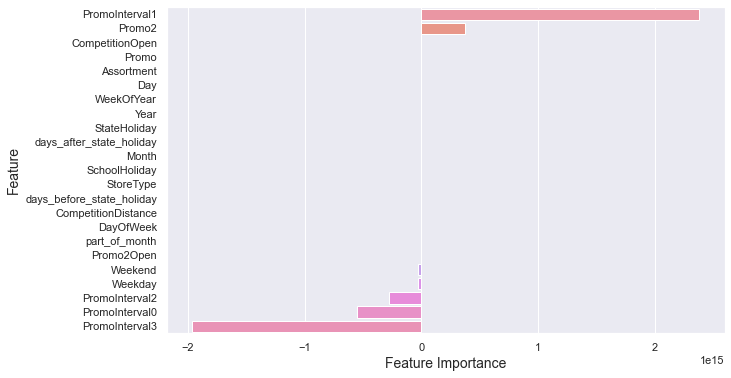

In [29]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Feature Importance", y=feat_imp.index, data=feat_imp)
plt.ylabel('Feature', fontsize=14)
plt.xlabel('Feature Importance', fontsize=14)
plt.show()


In [37]:
y_preds = model.predict(test_features) 
prediction_df = test_features.copy()
prediction_df["y_true"] = test_sales
prediction_df["y_pred"] = y_preds 
prediction_df[["y_true", "y_pred"]].head() 

,y_true,y_pred
0,9423.00,-29094018695841.23
1,13650.00,-29094018609565.62
2,10981.00,-29094018621250.58
3,5894.00,-29094018654492.46
4,4501.00,-29094018635416.67


<AxesSubplot:xlabel='Day', ylabel='y_true'>

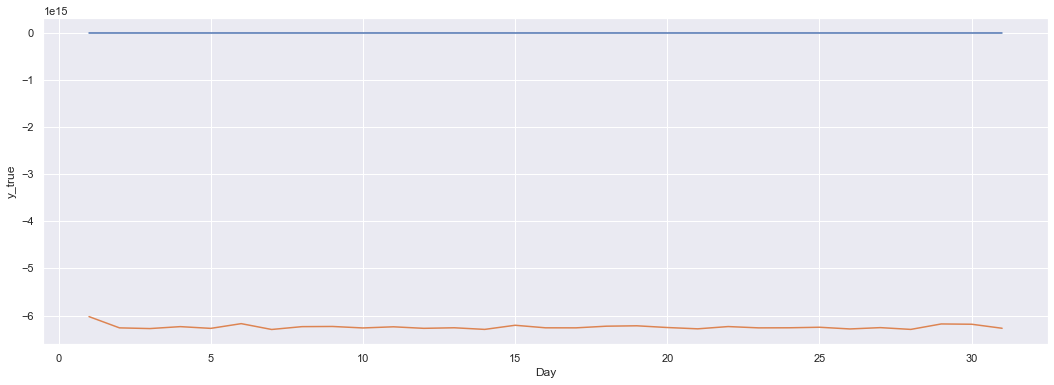

In [38]:
daily_trend = prediction_df.groupby(['Day']).agg({'y_true': 'mean', 'y_pred': 'mean'})
plt.figure(figsize=(18, 6))
sns.lineplot(x=daily_trend.index, y=daily_trend["y_true"])
sns.lineplot(x=daily_trend.index, y=daily_trend["y_pred"])

## SGD Regressor

In [59]:
model = file_handler.read_model("LGBMRegressor-sales-2021-08-01-13:12")
model


2021-08-01 18:05:30,887 — DfHelper — DEBUG — model read as pkl


LGBMRegressor()

In [60]:
feat_imp = pd.DataFrame({'Feature': feature_columns, 'Feature Importance': model.feature_importances_})
feat_imp = feat_imp.set_index('Feature')
feat_imp = feat_imp.sort_values(by=['Feature Importance'], ascending=False)
feat_imp

,Feature Importance
Feature,
CompetitionDistance,1145
CompetitionOpen,259
StoreType,259
Day,188
Assortment,168
Promo2Open,165
DayOfWeek,161
PromoInterval0,134
days_after_state_holiday,111


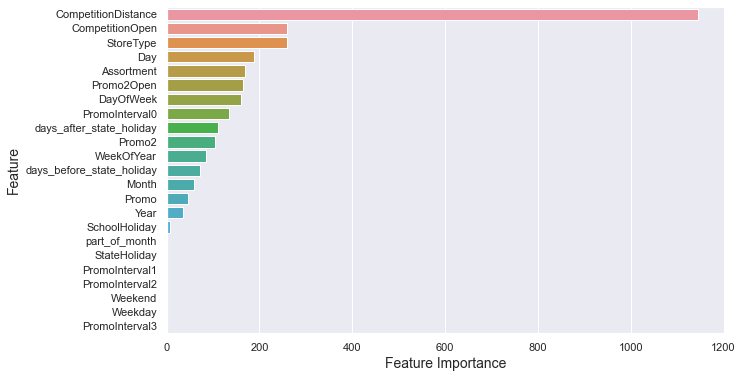

In [61]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Feature Importance", y=feat_imp.index, data=feat_imp)
plt.ylabel('Feature', fontsize=14)
plt.xlabel('Feature Importance', fontsize=14)
plt.show()


In [62]:
y_preds = model.predict(test_features) 
prediction_df = test_features.copy()
prediction_df["y_true"] = test_sales
prediction_df["y_pred"] = y_preds 
prediction_df[["y_true", "y_pred"]].head() 

,y_true,y_pred
0,9423,12555.95
1,13650,11493.72
2,10981,10768.62
3,5894,11517.17
4,4501,11200.72


<AxesSubplot:xlabel='Day', ylabel='y_true'>

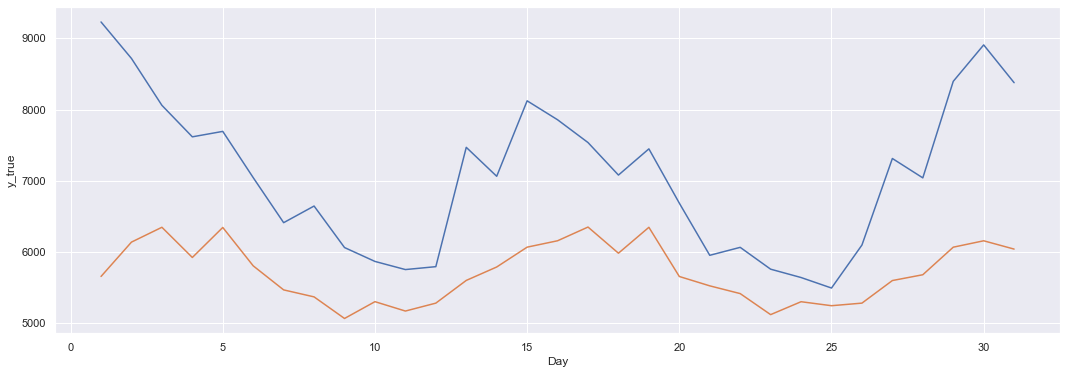

In [72]:
daily_trend = prediction_df.groupby(['Day']).agg({'y_true': 'mean', 'y_pred': 'mean'})
plt.figure(figsize=(18, 6))
sns.lineplot(x=daily_trend.index, y=daily_trend["y_true"])
sns.lineplot(x=daily_trend.index, y=daily_trend["y_pred"])

## Random Forest Regressor

In [47]:
model = file_handler.read_model("RandomForestRegressor-sales-2021-08-01-12:56")
model

2021-08-01 18:02:10,203 — DfHelper — DEBUG — model read as pkl


RandomForestRegressor(max_depth=10, n_estimators=200, verbose=True)

In [49]:
feat_imp = pd.DataFrame({'Feature': feature_columns, 'Feature Importance': model.feature_importances_})
feat_imp = feat_imp.set_index('Feature')
feat_imp = feat_imp.sort_values(by=['Feature Importance'], ascending=False)
feat_imp

,Feature Importance
Feature,
Promo,0.35
CompetitionDistance,0.23
DayOfWeek,0.08
WeekOfYear,0.06
Assortment,0.05
StoreType,0.04
Promo2Open,0.04
CompetitionOpen,0.03
Day,0.02


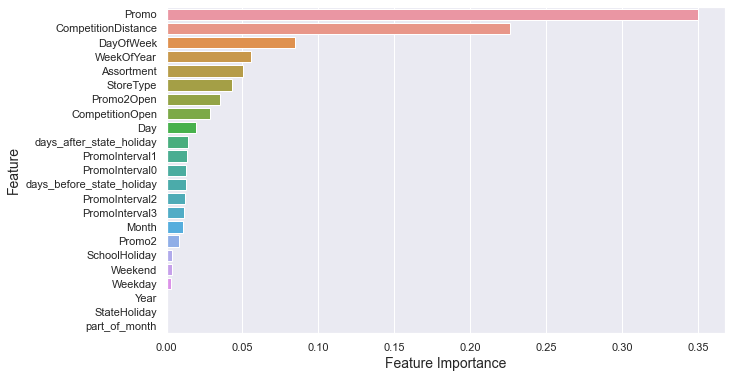

In [50]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Feature Importance", y=feat_imp.index, data=feat_imp)
plt.ylabel('Feature', fontsize=14)
plt.xlabel('Feature Importance', fontsize=14)
plt.show()


In [51]:
y_preds = model.predict(test_features) 
prediction_df = test_features.copy()
prediction_df["y_true"] = test_sales
prediction_df["y_pred"] = y_preds 
prediction_df[["y_true", "y_pred"]].head() 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished


,y_true,y_pred
0,9423,6502.11
1,13650,6944.93
2,10981,7984.91
3,5894,6491.92
4,4501,8038.28


<AxesSubplot:xlabel='Day', ylabel='y_true'>

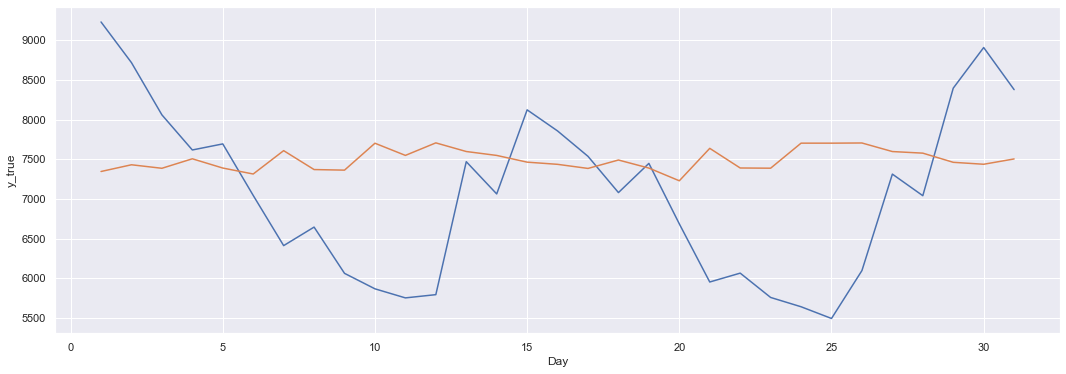

In [52]:
daily_trend = prediction_df.groupby(['Day']).agg({'y_true': 'mean', 'y_pred': 'mean'})
plt.figure(figsize=(18, 6))
sns.lineplot(x=daily_trend.index, y=daily_trend["y_true"])
sns.lineplot(x=daily_trend.index, y=daily_trend["y_pred"])

## XGBOOST Regressor

In [66]:
model = file_handler.read_model("XGBRegressor-sales-2021-08-01-15:26")
model


2021-08-01 18:30:13,534 — DfHelper — DEBUG — model read as pkl


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.02, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.0199999996, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, nthread=-1, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [67]:
feat_imp = pd.DataFrame({'Feature': feature_columns, 'Feature Importance': model.feature_importances_})
feat_imp = feat_imp.set_index('Feature')
feat_imp = feat_imp.sort_values(by=['Feature Importance'], ascending=False)
feat_imp

,Feature Importance
Feature,
Promo,0.94
WeekOfYear,0.01
DayOfWeek,0.01
Assortment,0.00
Month,0.00
Day,0.00
CompetitionDistance,0.00
Promo2,0.00
PromoInterval1,0.00


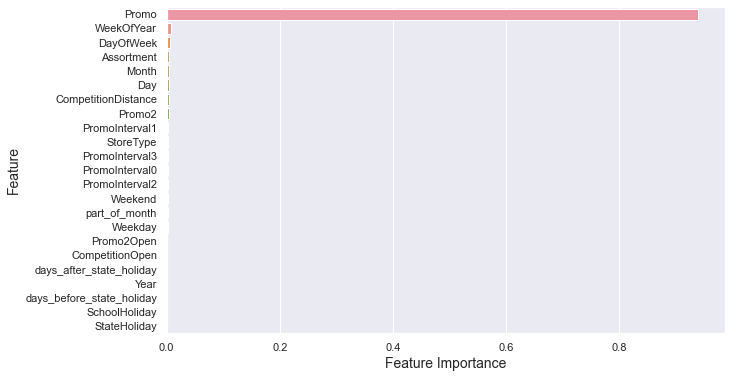

In [68]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Feature Importance", y=feat_imp.index, data=feat_imp)
plt.ylabel('Feature', fontsize=14)
plt.xlabel('Feature Importance', fontsize=14)
plt.show()


In [69]:
y_preds = model.predict(test_features) 
prediction_df = test_features.copy()
prediction_df["y_true"] = test_sales
prediction_df["y_pred"] = y_preds 
prediction_df[["y_true", "y_pred"]].head() 

,y_true,y_pred
0,9423,6595.03
1,13650,6520.35
2,10981,6723.76
3,5894,6463.75
4,4501,7031.41


<AxesSubplot:xlabel='Day', ylabel='y_true'>

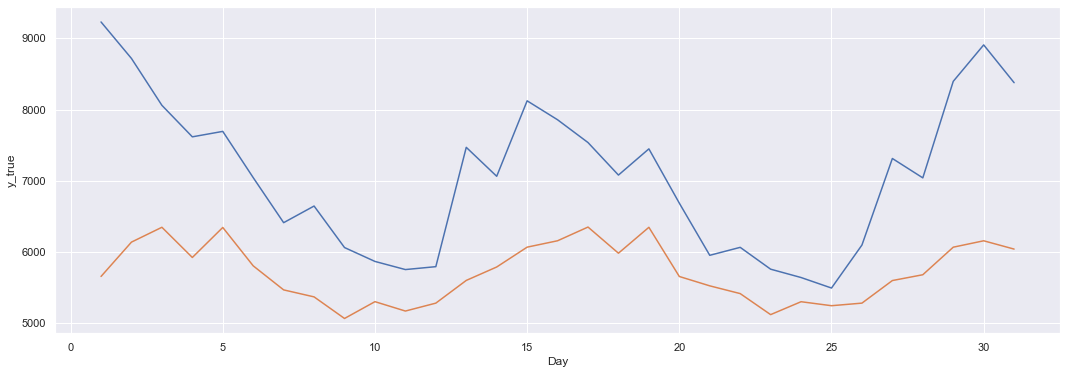

In [70]:
daily_trend = prediction_df.groupby(['Day']).agg({'y_true': 'mean', 'y_pred': 'mean'})
plt.figure(figsize=(18, 6))
sns.lineplot(x=daily_trend.index, y=daily_trend["y_true"])
sns.lineplot(x=daily_trend.index, y=daily_trend["y_pred"])

We will explore each model one by one

In [12]:
feat_imp = pd.DataFrame({'Feature Importance': rf_model.feature_importances_})
feat_imp['Feature'] = feature_columns
feat_imp = feat_imp.set_index('Feature')
feat_imp = feat_imp.sort_values(by=['Feature Importance'], ascending=False)
feat_imp


,Feature Importance
Feature,
CompetitionDistance,0.27
Promo,0.16
CompetitionOpenSinceMonth,0.08
DayOfWeek,0.06
CompetitionOpenSinceYear,0.06
Promo2SinceYear,0.05
Promo2SinceWeek,0.05
StoreType,0.04
days_after_state_holiday,0.04


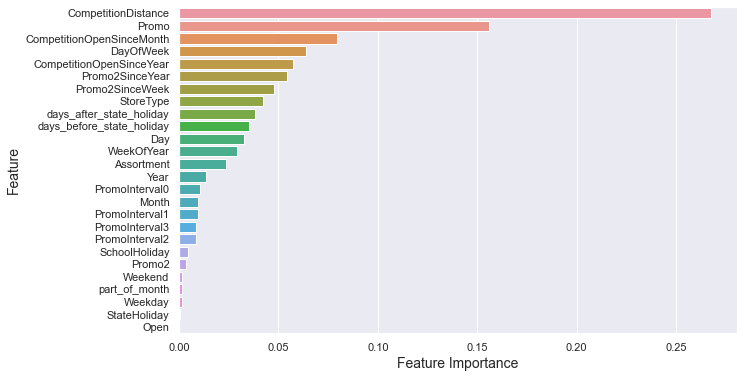

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Feature Importance", y=feat_imp.index, data=feat_imp)
plt.ylabel('Feature', fontsize=14)
plt.xlabel('Feature Importance', fontsize=14)
plt.show()

## Time Series Model

In [2]:
model = tf.keras.models.load_model("../models/TimeSeriesModel-Sales-2021-08-01-15:54")

2021-08-01 19:20:49.819830: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 32)          4352      
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________


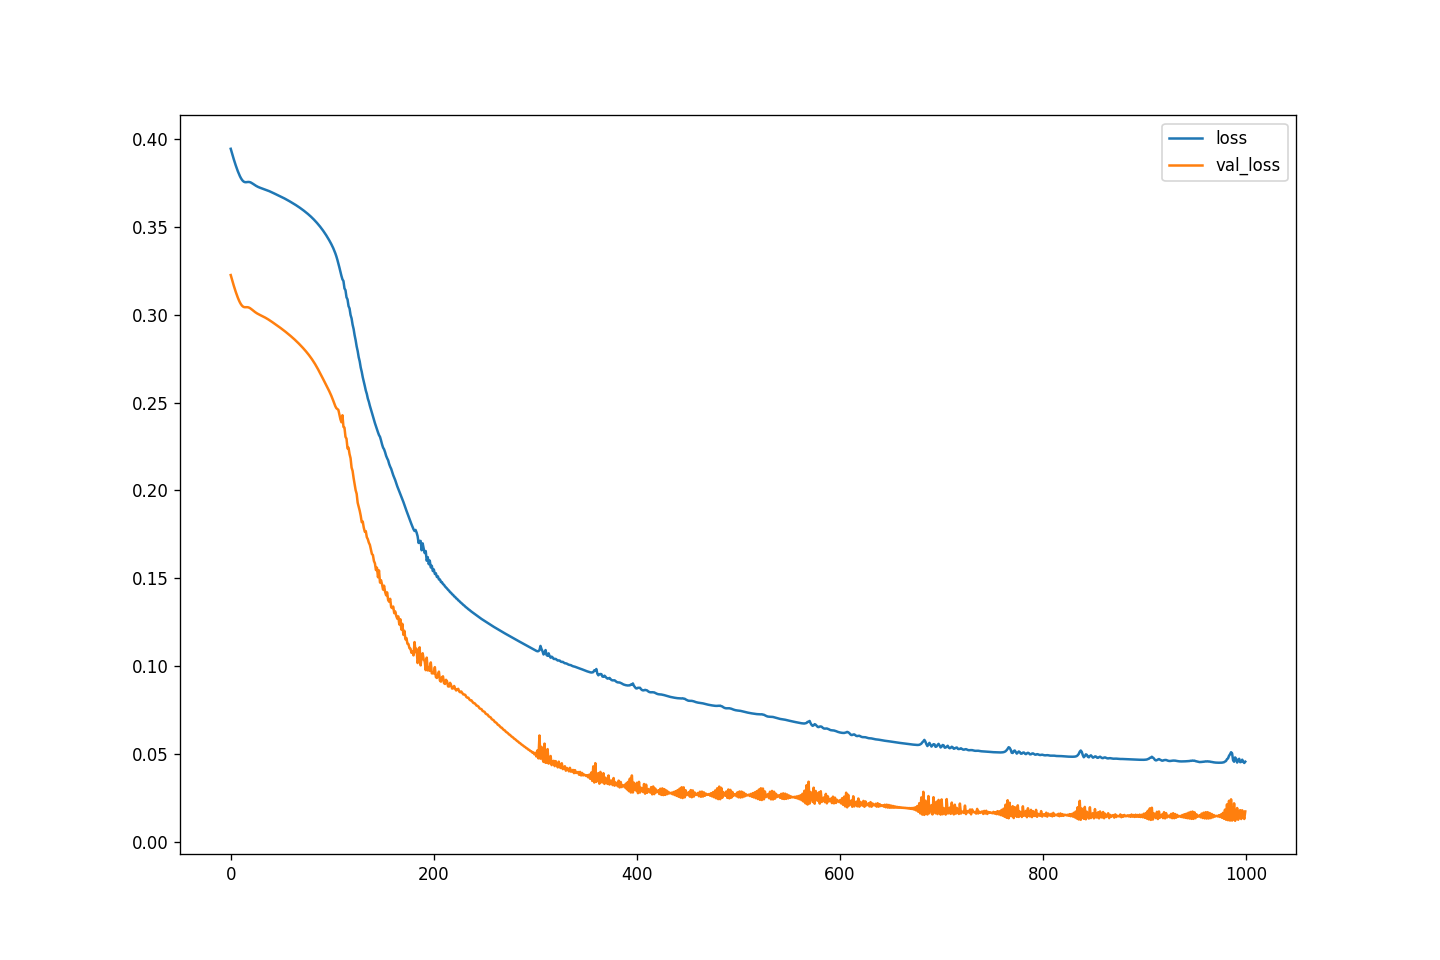

In [18]:
Image("../img/TimeSeriesModel-Customers-2021-08-01-12:43.png")

In [27]:
WINDOW_SIZE = 48
train_df = file_handler.read_csv("../data/test.csv")
train_df["Date"] = train_df.index
train_df["Date"] = train_df["Date"].astype("datetime64[ns]")

2021-08-01 19:44:06,030 — DfHelper — DEBUG — file read as csv


In [29]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(len(series)).prefetch(1)
    forecast = model.predict(ds)
    return forecast